In [136]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline


## Загрузка и замена

In [137]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Размер датасета

In [138]:
df.shape

(8124, 23)

Есть ли пустые строки

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Кодирование данных по столбцам

In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    if i == 'veil-type': continue
    df[i] = le.fit_transform(df[i])
    
df['veil-type'] = le.fit_transform(df['veil-type'])
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

## Определим признаки, которые наиболее сильно влияют на ядовитость гриба

In [142]:
corr = df.corr()['class']

In [143]:
corr.sort_values()

gill-color                 -0.530566
bruises                    -0.501530
ring-type                  -0.411771
stalk-root                 -0.379361
gill-spacing               -0.348387
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
ring-number                -0.214366
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
stalk-shape                -0.102019
odor                       -0.093552
cap-color                  -0.031384
cap-shape                   0.052951
gill-attachment             0.129200
veil-color                  0.145142
spore-print-color           0.171961
cap-surface                 0.178446
habitat                     0.217179
population                  0.298686
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
Name: class, dtype: float64

У veil-type стоит NaN, т.к. значения во всех строках в исходном датасете - p

In [144]:
df['veil-type'].unique()

array([0])

## Классификация методом kNN

Подготовка датасета для обучения - сохраняем таргет и самый коррелирующие признаки

In [145]:
y = df['class'] # сохраняем таргет

X = df.drop(['class', 'veil-type'], axis=1)

Подбираем оптимальные гиперпараметры

Best K = 1
Best cross_val_score = 0.9688586585827966


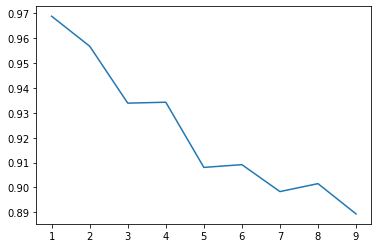

In [146]:
cv = KFold(n_splits=5, shuffle=False)

k_vals = np.arange(1, 10, 1)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=cv).mean() for k in k_vals
]

print("Best K =", k_vals[np.argmax(quality_by_k)])
print("Best cross_val_score =", np.max(quality_by_k))
plt.plot(k_vals, quality_by_k)


Лучший score получился при k=1, значит, с данными что-то не так. Т.к. количество категорий у каждого параметра разные, то признаки нужно промасштабировать.

Признаки до масштабирования

In [147]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Масштабирование

In [148]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

X = pd.DataFrame(X_scaled)
X.describe()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,8.124000e+03,8124.000000,8.124000e+03,8124.000000,8124.000000,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,...,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03
mean,1.189486e-16,0.000000,-6.996974e-18,0.000000,0.000000,1.819213e-16,1.399395e-17,-8.396369e-17,-2.798790e-17,-1.399395e-16,...,-2.239032e-16,5.597579e-17,-1.959153e-16,-2.798790e-17,1.959153e-16,1.399395e-16,5.597579e-17,-1.119516e-16,-1.469365e-16,5.597579e-17
std,1.000062e+00,1.000062,1.000062e+00,1.000062,1.000062,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,...,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-2.087047e+00,-1.486157,-1.769549e+00,-0.843230,-1.970316,-6.138869e+00,-4.388636e-01,-6.690383e-01,-1.358896e+00,-1.144806e+00,...,-2.534652e+00,-2.372490e+00,-3.058611e+00,-3.038361e+00,-8.100146e+00,-3.945519e+00,-1.272216e+00,-1.509643e+00,-2.910546e+00,-8.771691e-01
25%,-8.403434e-01,-1.486157,-5.910746e-01,-0.843230,-1.019565,1.628965e-01,-4.388636e-01,-6.690383e-01,-7.939470e-01,-1.144806e+00,...,-9.254372e-01,-8.930529e-01,9.657680e-02,1.076554e-01,1.420366e-01,-2.561317e-01,-1.272216e+00,-6.701949e-01,-5.143892e-01,-8.771691e-01
50%,-2.169915e-01,0.140128,-1.982498e-01,-0.843230,0.406562,1.628965e-01,-4.388636e-01,-6.690383e-01,5.347685e-02,8.735106e-01,...,6.837777e-01,5.863847e-01,6.224414e-01,6.319914e-01,1.420366e-01,-2.561317e-01,-1.620674e-01,-2.504706e-01,2.843298e-01,-2.957297e-01
75%,1.029712e+00,0.953270,1.373049e+00,1.185917,0.406562,1.628965e-01,-4.388636e-01,1.494683e+00,6.184261e-01,8.735106e-01,...,6.837777e-01,5.863847e-01,6.224414e-01,6.319914e-01,1.420366e-01,-2.561317e-01,9.480809e-01,1.428426e+00,2.843298e-01,2.857098e-01
max,1.029712e+00,0.953270,1.765874e+00,1.185917,1.832689,1.628965e-01,2.278612e+00,1.494683e+00,1.748325e+00,8.735106e-01,...,2.292993e+00,2.065822e+00,1.148306e+00,1.156327e+00,4.263128e+00,3.433255e+00,9.480809e-01,1.848151e+00,1.083049e+00,2.611468e+00


Разобьем выборку на тест и трейн

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

Обучим kNN

No handles with labels found to put in legend.


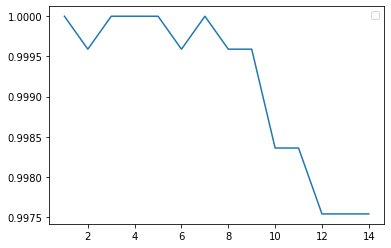

In [150]:
neibs = np.arange(1, 15)
accuracy = np.zeros(len(neibs))
for i, k in enumerate(neibs):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    accuracy[i] = clf.score(X_test, y_test)

plt.plot(neibs, accuracy)
plt.legend()
plt.show()


In [151]:
cv = KFold(n_splits=10, shuffle=False)

cross_val_score(KNeighborsClassifier(n_neighbors=3), X, y, cv=cv).mean()

0.9996305418719211

In [154]:
cv = KFold(n_splits=10, shuffle=False)

cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=cv).mean()


0.9981527093596059

In [155]:
cv = KFold(n_splits=10, shuffle=False)

cross_val_score(KNeighborsClassifier(n_neighbors=7), X, y, cv=cv).mean()


0.9981527093596059

Лучший результат достигается при k=3. Выбираем метрику

In [158]:
cross_val_score(KNeighborsClassifier(
    n_neighbors=3, metric='euclidean'), X, y, cv=cv).mean()


0.9996305418719211

In [159]:
cross_val_score(KNeighborsClassifier(
    n_neighbors=3, metric='manhattan'), X, y, cv=cv).mean()

0.9998768472906404

In [160]:
cross_val_score(KNeighborsClassifier(
    n_neighbors=3, metric='minkowski'), X, y, cv=cv).mean()


0.9996305418719211

Лучший результат с метрикой Манхеттен

## Анализ классификации

Еще раз классифицируем модель по k=3 с метрикой Манхеттен

In [162]:
clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Вывод метрик

In [163]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(clf, X, y, scoring=scoring)
precision = scores['test_precision_macro'].mean()
print('precision', precision)
recall = scores['test_recall_macro'].mean()
print('recall', recall)
print('f1', 2*precision*recall/(precision+recall))


precision 0.9301467921502372
recall 0.8908418962776021
f1 0.9100701584819114
